<a href="https://colab.research.google.com/github/mariafirozx/book-recommendation/blob/main/book_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/csvs/books.csv', error_bad_lines=False)
df.head()

<ipython-input-3-01b4fd91413b>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/csvs/books.csv', error_bad_lines=False)
Skipping line 3350: expected 12 fields, saw 13
Skipping line 4704: expected 12 fields, saw 13
Skipping line 5879: expected 12 fields, saw 13
Skipping line 8981: expected 12 fields, saw 13



,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [ ]:
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [ ]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


<ipython-input-6-739720ce95a9>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


<Axes: xlabel='average_rating', ylabel='title'>

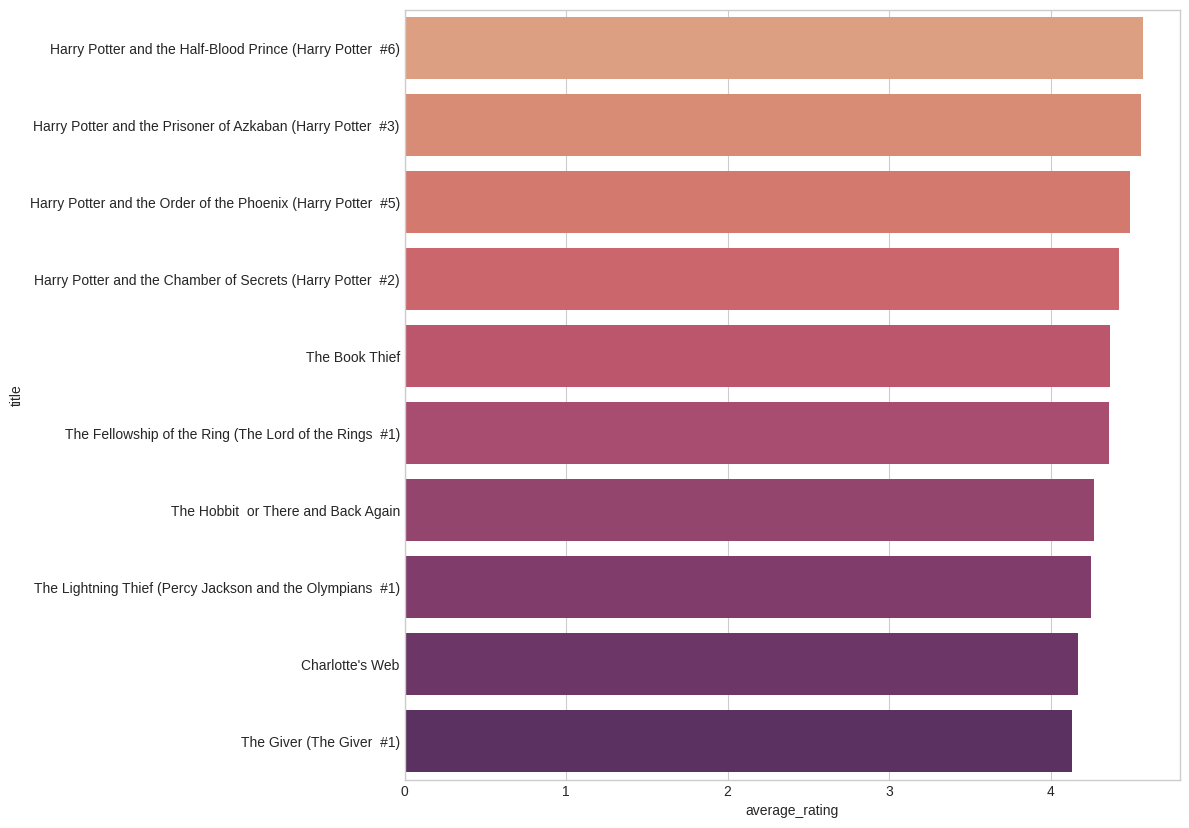

In [ ]:
#top ten filter

topTen = df[df['ratings_count']>1000000]
topTen.sort_values(by='average_rating', ascending=False)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,10))
data = topTen.sort_values(by='average_rating',ascending=False).head(10)
sns.barplot(x="average_rating", y="title", data=data,palette='flare')


the results above shows the top 10 books in the data. the data had a max 5.0 ratings, and the top 10 are sorted according to the number of votes. books voted 1 or 2 with 5.0 ratings have been avoided.

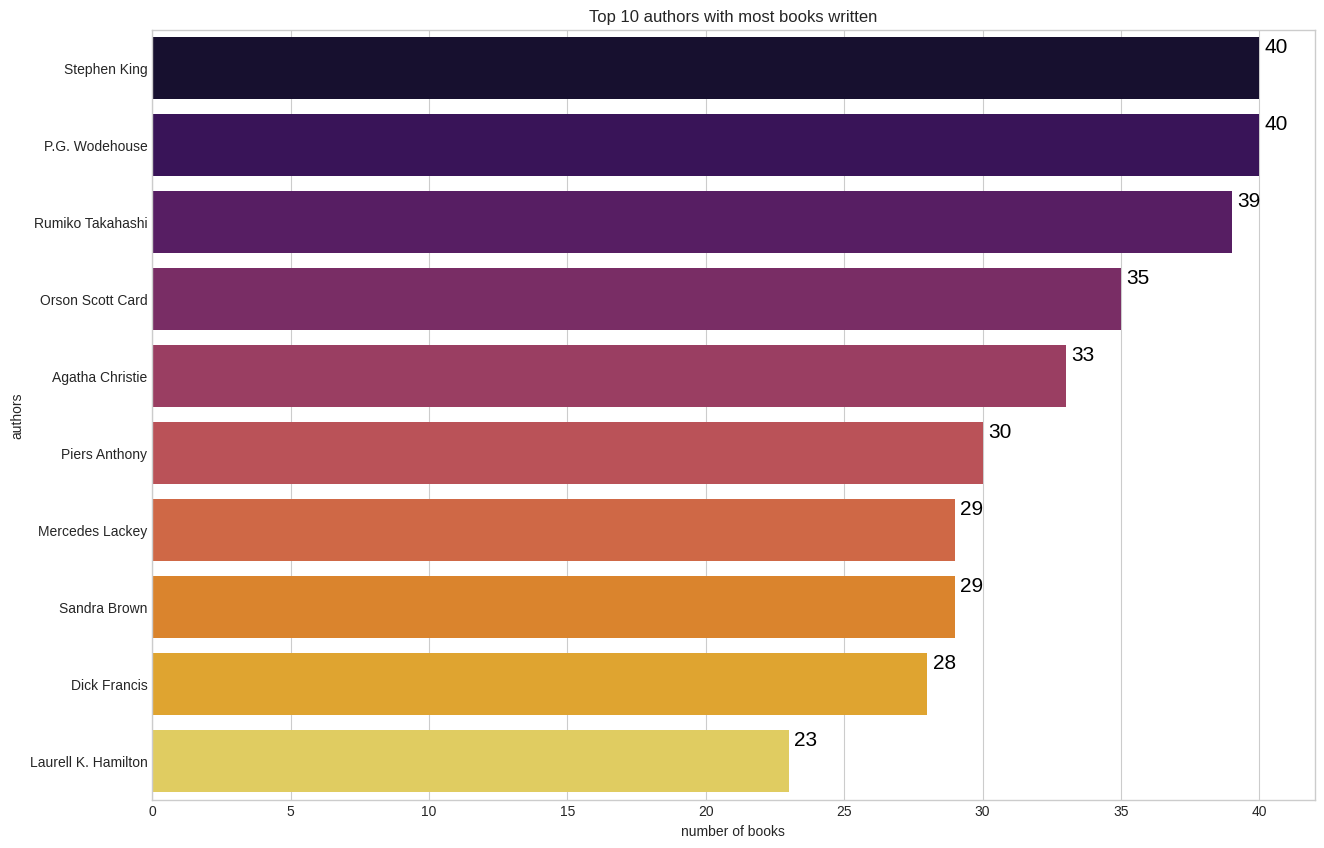

In [ ]:
mostBook = df.groupby('authors')['title'].count().reset_index().sort_values('title',
                                                                            ascending=False).head(10).set_index('authors')
plt.figure(figsize=(15,10))
ax = sns.barplot(x=mostBook['title'], y=mostBook.index, palette='inferno')
ax.set_title("Top 10 authors with most books written")
ax.set_xlabel("number of books")

totals = []

for i in ax.patches:
  totals.append(i.get_width())
  total = sum(totals)

for i in ax.patches:
  ax.text(i.get_width()+.2, i.get_y()+.2, str(round(i.get_width())), fontsize=15, color='black')

plt.show()

The above bar shows the authors with most books written in an descending order. Top authors with most books are Stephen King and P.G. Wodehouse with 40 books respectively. Each book total is provided with the authors bar range by summing up each authors books. Hence resulting in 'totals'.


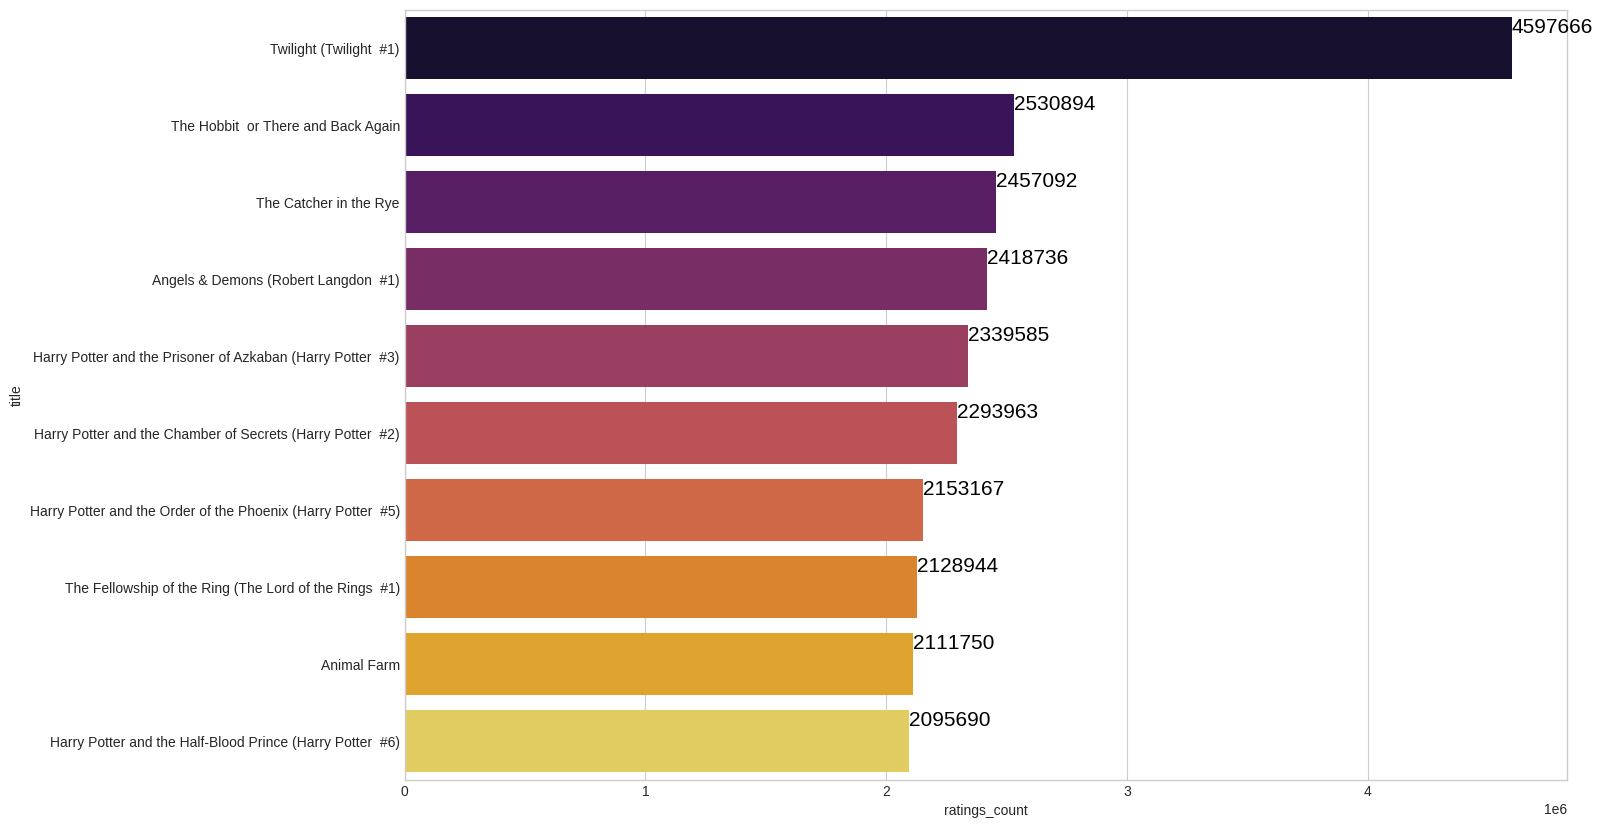

In [ ]:
most_rated = df.sort_values('ratings_count', ascending=False).head(10).set_index('title')
plt.figure(figsize=(15,10))
ax = sns.barplot(x=most_rated['ratings_count'], y=most_rated.index, palette='inferno')

totals=[]

for i in ax.patches:
  totals.append(i.get_width())
total = sum(totals)

for i in ax.patches:
  ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15, color='black')

plt.show()

<ipython-input-9-cc7f5b1d3f01>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['average_rating'], ax=ax)


Text(0.5, 0, 'Average rating')

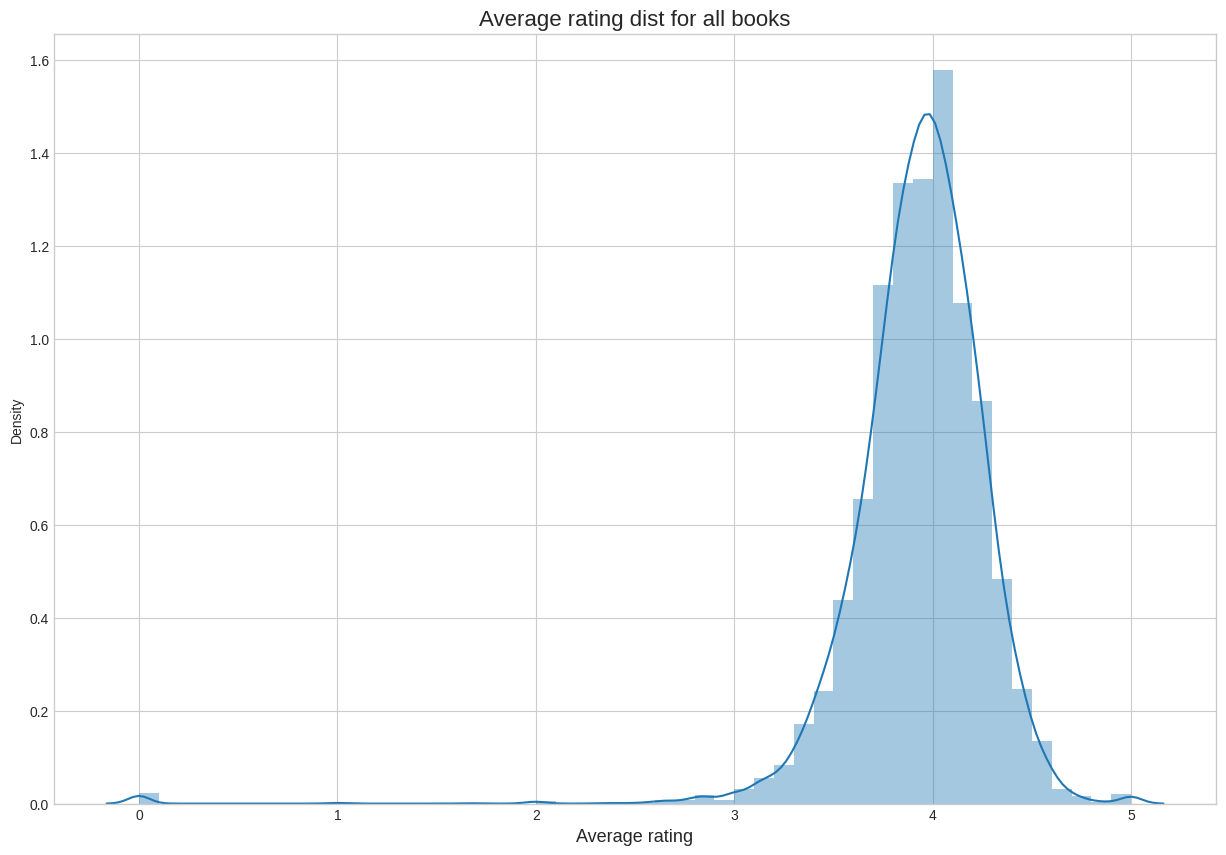

In [ ]:
df.average_rating = df.average_rating.astype(float)
fig, ax = plt.subplots(figsize=[15,10])
sns.distplot(df['average_rating'], ax=ax)
ax.set_title('Average rating dist for all books', fontsize=16)
ax.set_xlabel('Average rating', fontsize=13)

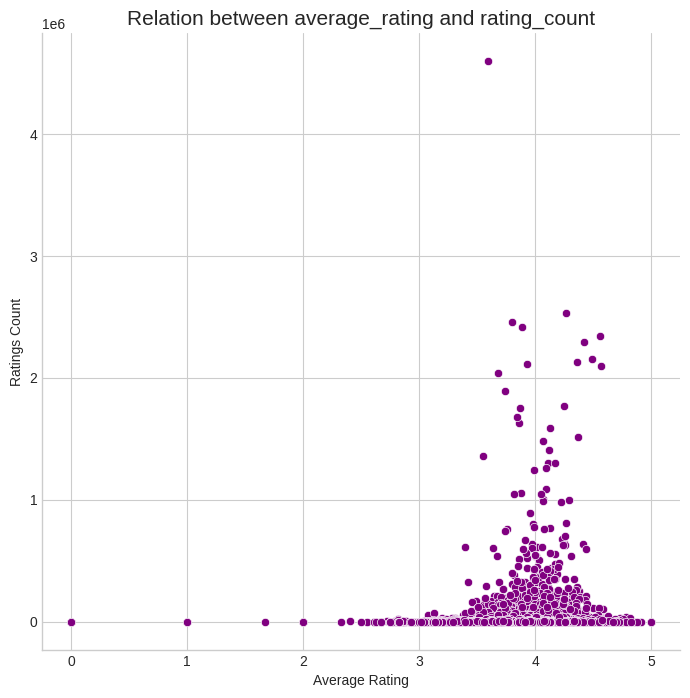

In [ ]:
ax = sns.relplot(data=df, x ="average_rating", y='ratings_count', color='purple', sizes=(100,200), height=7, marker='o')
plt.title("Relation between average_rating and rating_count",fontsize=15)
ax.set_axis_labels("Average Rating", "Ratings Count")

In [ ]:
df2 = df.copy()

In [ ]:
df2.loc[ (df2['average_rating'] >= 0) & (df2['average_rating'] <= 1), 'rating_between'] = "between 0 and 1"
df2.loc[ (df2['average_rating'] > 1) & (df2['average_rating'] <= 2), 'rating_between'] = "between 1 and 2"
df2.loc[ (df2['average_rating'] > 2) & (df2['average_rating'] <= 3), 'rating_between'] = "between 2 and 3"
df2.loc[ (df2['average_rating'] > 3) & (df2['average_rating'] <= 4), 'rating_between'] = "between 3 and 4"
df2.loc[ (df2['average_rating'] > 4) & (df2['average_rating'] <= 5), 'rating_between'] = "between 4 and 5"


In [ ]:
rating_df = pd.get_dummies(df2['rating_between'])
lang_df = pd.get_dummies(df2['language_code'])

In [ ]:
features = pd.concat([rating_df, lang_df, df2['average_rating'], df2['ratings_count']], axis=1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
features = min_max_scaler.fit_transform(features)

In [ ]:
model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
model.fit(features)
dist, idlist = model.kneighbors(features)

In [ ]:
def book_recomm(b_name):
  b_list_name = []
  book_id = df2[df2['title'] == b_name].index
  book_id = book_id[0]
  for newID in idlist[book_id]:
    b_list_name.append(df2.loc[newID].title)
  return b_list_name

book_names = book_recomm('Bill Brysons African Diary')
book_names


IndexError: ignored